## Name: Aman P

## Implementing Feedforward neural networks with Keras and TensorFlowfor classification of hand-written MNIST dataset using below steps:
    a.Import the necessary packages
    b.Load the training and testing data
    c.Define the network architecture using Keras
    d.Train the model using SGDwith 11 epochs
    e.Evaluate the network
    f.Plot the training loss and accuracy 

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
import pandas as pd

In [2]:
# Load the data from CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Separate features and labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Reshape the data to (num_samples, 28, 28, 1) for convolutional network


# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(28*28,)),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-16 03:20:42.038565: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-16 03:20:42.038601: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-16 03:20:42.038611: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-16 03:20:42.038644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-16 03:20:42.038662: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='sgd',metrics=['accuracy'],loss=SparseCategoricalCrossentropy())

In [6]:
epochs = 11
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/11
  14/1875 [..............................] - ETA: 7s - loss: 2.4821 - accuracy: 0.1071  

2023-11-16 03:20:42.675179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6769 - accuracy: 0.8033 - val_loss: 0.3698 - val_accuracy: 0.8936
Epoch 2/11
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3576 - accuracy: 0.8978 - val_loss: 0.3190 - val_accuracy: 0.9076
Epoch 3/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3269 - accuracy: 0.9061 - val_loss: 0.3032 - val_accuracy: 0.9147
Epoch 4/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3139 - accuracy: 0.9102 - val_loss: 0.3010 - val_accuracy: 0.9148
Epoch 5/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3070 - accuracy: 0.9126 - val_loss: 0.2917 - val_accuracy: 0.9172
Epoch 6/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3025 - accuracy: 0.9149 - val_loss: 0.2945 - val_accuracy: 0.9172
Epoch 7/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3016 - accuracy: 0.9151 - val_loss: 0.2946 - val_accuracy: 0.9178
Epo

313/313 [==============================] - 1s 2ms/step
Actual no: 7 Predicted no: 7


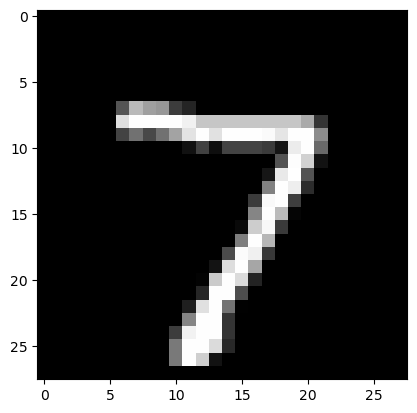

Actual no: 2 Predicted no: 2


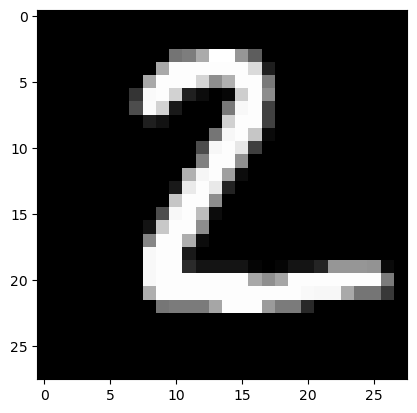

Actual no: 1 Predicted no: 1


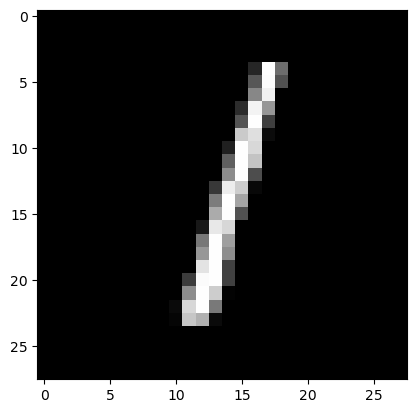

Actual no: 0 Predicted no: 0


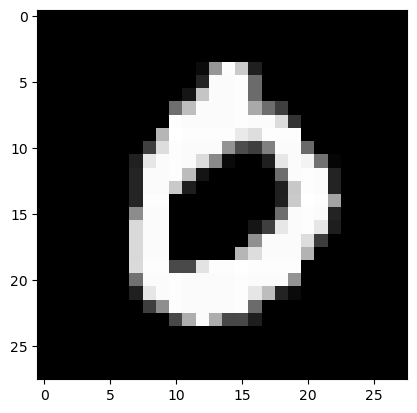

Actual no: 4 Predicted no: 4


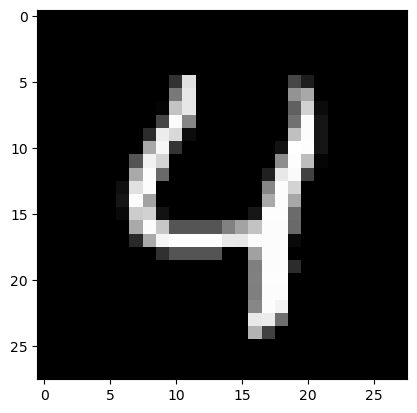

Actual no: 1 Predicted no: 1


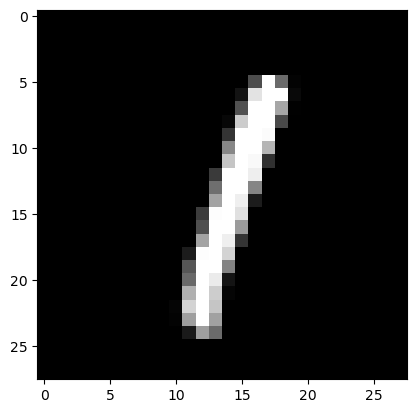

Actual no: 4 Predicted no: 4


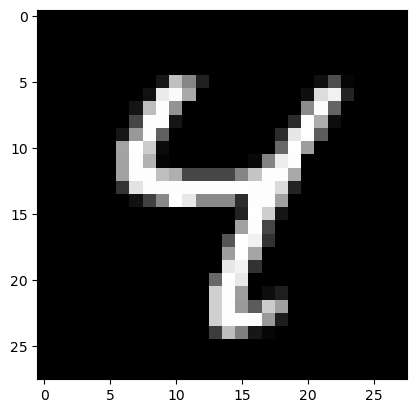

Actual no: 9 Predicted no: 9


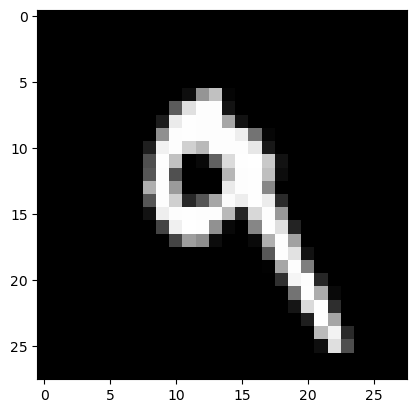

Actual no: 5 Predicted no: 6


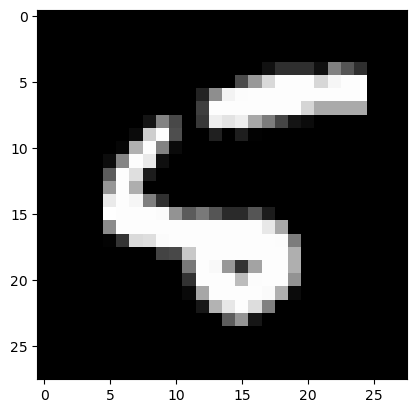

Actual no: 9 Predicted no: 4


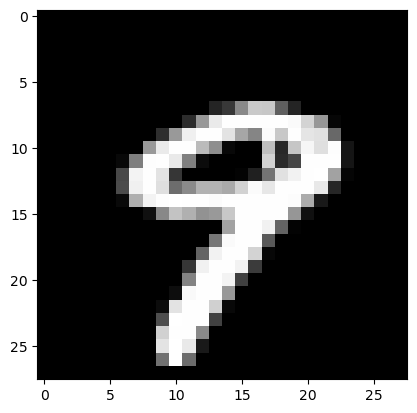

In [7]:
# Function to display actual and predicted numbers with images
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(X_test)

def display_actual_vs_predicted(n):
    actual_number = y_test[n]
    predicted_number = np.argmax(predictions[n])

    plt.imshow(X_test[n].reshape(28, 28), cmap='gray')
    print("Actual no:", actual_number,"Predicted no:",predicted_number)
    plt.show()

# Display a few examples
for i in range(10):
    display_actual_vs_predicted(i)


In [8]:
from sklearn.metrics import classification_report
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

313/313 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       980
           1       0.97      0.80      0.88      1135
           2       0.71      0.84      0.77      1032
           3       0.81      0.83      0.82      1010
           4       0.78      0.96      0.86       982
           5       0.75      0.76      0.76       892
           6       0.93      0.87      0.90       958
           7       0.86      0.88      0.87      1028
           8       0.76      0.80      0.78       974
           9       0.98      0.64      0.77      1009

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.82     10000
weighted avg       0.84      0.83      0.83     10000



In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 1.639306902885437
Test accuracy: 82.60000348091125


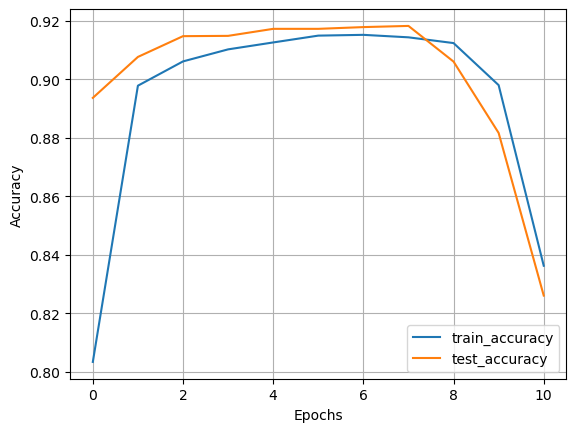

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

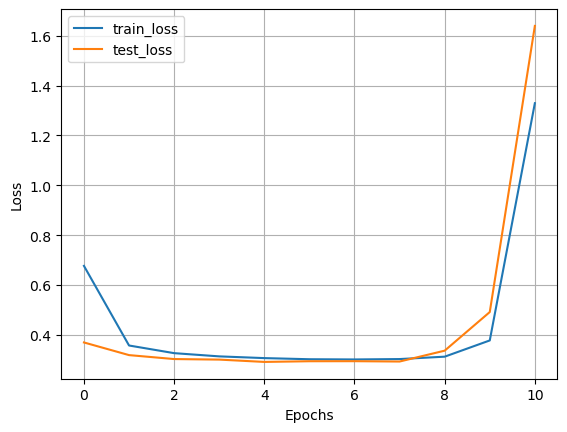

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();